# Seed Level on Donation Amount in Kitabisa Website

**BE CAREFUL OF THE PATH, IN ORDER TO NOT OVERWRITE IT**

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import scipy
import warnings
from datetime import date, datetime, time, timedelta

import matplotlib.pyplot as plt
from matplotlib.pyplot import title
import seaborn as sns

import scrape as sc
import cleaning as cln

## Data Reading and Cleaning

First, I am going to read and append all donors and donation properties data which is already scrapped from Kitabisa website. Then after that, I am going to clean the data using the module that I already built. The module for cleaning the data has three purposes:

1. Only taking the important variables and columns for analysis
2. Reformatting the data type to the correct one
3. Aggregating some columns to make it more meaningful for the analysis

In [2]:
# Read and append all the data in the path

path = "/Users/mac/Documents/RU/THESIS/working_thesis/fixed_data/donors_info/"

files = os.path.join(path, "*.csv")  # change the url based on the location of csv
files = glob.glob(files)

df_main = pd.concat(map(pd.read_csv, files), ignore_index=True)
print("In total, there are", len(df_main), "donors/donation made in the pooled data.")
df_main.head(5)

In total, there are 1494358 donors/donation made in the pooled data.


,id,is_anonymous,comment,amount,created,expire,verified,formatted,formatted_without_comment,campaign.id,...,status.description.id,status.description.en,invoice.base_donation,invoice.unique_code,invoice.transaction_fee,invoice.total_invoiced,payment_method.type,payment_method.name,time_scrapped,short_url
0,89438370.0,True,NaN,10000.0,1663983191.0,1664004791.0,1663983192.0,Anonim Rp10.000,Donasi Rp10.000,354528.0,...,"Proyek berhasil, dana telah disalurkan ke pemi...","Proyek berhasil, dana telah disalurkan ke pemi...",10000.0,0.0,0.0,10000.0,WALLET,Dompet Kebaikan,2022-09-30 13:44:14,ringankanbebanduafa
1,89430617.0,True,YaAllah berilah hamba mobil honda jazz yg bagu...,1000.0,1663975668.0,1663976268.0,1663975678.0,Anonim Rp1.000 (YaAllah berilah hamba mobil ho...,Donasi Rp1.000,354528.0,...,"Proyek berhasil, dana telah disalurkan ke pemi...","Proyek berhasil, dana telah disalurkan ke pemi...",1000.0,0.0,0.0,1000.0,SHOPEEPAY,SHOPEEPAY_APP,2022-09-30 13:44:14,ringankanbebanduafa
2,89415247.0,True,NaN,5000.0,1663970653.0,1663992253.0,1663970653.0,Anonim Rp5.000,Donasi Rp5.000,354528.0,...,"Proyek berhasil, dana telah disalurkan ke pemi...","Proyek berhasil, dana telah disalurkan ke pemi...",5000.0,0.0,0.0,5000.0,WALLET,Dompet Kebaikan,2022-09-30 13:44:14,ringankanbebanduafa
3,89026186.0,True,NaN,10000.0,1663583759.0,1663644959.0,1663583759.0,Anonim Rp10.000,Donasi Rp10.000,354528.0,...,"Proyek berhasil, dana telah disalurkan ke pemi...","Proyek berhasil, dana telah disalurkan ke pemi...",10000.0,0.0,0.0,10000.0,WALLET,Dompet Kebaikan,2022-09-30 13:44:14,ringankanbebanduafa
4,89010171.0,True,Bismillah niat sedekah ya Allah,7000.0,1663551979.0,1663573579.0,1663551979.0,Anonim Rp7.000 (Bismillah niat sedekah ya Allah),Donasi Rp7.000,354528.0,...,"Proyek berhasil, dana telah disalurkan ke pemi...","Proyek berhasil, dana telah disalurkan ke pemi...",7000.0,0.0,0.0,7000.0,WALLET,Dompet Kebaikan,2022-09-30 13:44:14,ringankanbebanduafa


#### Collapse and run this group of code if we still don't have the clean data!

*You can skip this reading and scraping stage if you already have the data, see the sign of **"you can skip until here!"***

In [4]:
# Scrape the donation information

warnings.filterwarnings('ignore')  # to surpass deprecated warning

donation_list = list(df_main['short_url'].unique())
flpath = '/Users/mac/Documents/RU/THESIS/working_thesis/fixed_data/campaign_info/'
df_donations_prop = sc.donationprop_scraper_to_dataframe(donation_list, flpath)

Successfully scrape donation from ringankanbebanduafa. Going to scrape the next donation.
Successfully scrape donation from zakatuntukfakirmiskinsantriyatimdhuafa. Going to scrape the next donation.
Successfully scrape donation from zakatfakirmiskinsantriyatimdhufa. Going to scrape the next donation.
Successfully scrape donation from bantusafiasembuh. Going to scrape the next donation.
Successfully scrape donation from patunganuntukanabul. Going to scrape the next donation.
Successfully scrape donation from untuktemanmaritza. Going to scrape the next donation.
Successfully scrape donation from bantuadikfaizsembuhdaritumormata. Going to scrape the next donation.
Successfully scrape donation from terapiautisdhuafa. Going to scrape the next donation.
Successfully scrape donation from zakatpendidikanrpk. Going to scrape the next donation.
Successfully scrape donation from wakafmushafalquran. Going to scrape the next donation.
Successfully scrape donation from bekalanakyatim. Going to scrap

In [3]:
# Use this code if you already have the data frame for donation properties in your local files

path = '/Users/mac/Documents/RU/THESIS/working_thesis/fixed_data/campaign_info/donation_list_with_prop_2022-10-05 10:40:09_.csv'
df_donations_prop = pd.read_csv(path)

After reading I found there's something wrong in the data. In "created" column, all data is supposed to be datetime format in epoch format. But there are 5 rows of data which is recorded as "Sedekah Masjid". Also, there are 4 rows which do not have amount value (null) in their column. I don't have any choices but to remove the data as the date time donation being made is the most important variables here in the analysis. We cannot assume as the data is pooled and not in order.

After that, I am going to clean and keep only the needed column. For the reference on how the cleaning works, check the script in **"cleaning.py"** file.

In [4]:
# cleaning specific for this file
df_main.drop(df_main[df_main['created'] == 'Sedekah Masjid'].index, inplace=True)  # removing incorrect data from the created column
df_main.drop(df_main[df_main['amount'].isnull()].index, inplace = True)  # removing rows that have null value

In [5]:
# clean donors file (only needed row) and save it to local path
donors_save_loc = '/Users/mac/Documents/RU/THESIS/working_thesis/fixed_data/_clean_221005/donors_cleaned_221005.csv'
df_donors = cln.clean_donors(df_main, donors_save_loc)

# clean donation information (only needed row) and save it to local path
donation_save_loc = '/Users/mac/Documents/RU/THESIS/working_thesis/fixed_data/_clean_221005/donationprop_cleaned_221005.csv'
df_donations = cln.clean_donation(df_donations_prop, donation_save_loc)

           id is_anonymous   amount  created_unix          created_ts  \
0  89438370.0         True  10000.0  1663983191.0 2022-09-24 01:33:11   
1  89430617.0         True   1000.0  1663975668.0 2022-09-23 23:27:48   
2  89415247.0         True   5000.0  1663970653.0 2022-09-23 22:04:13   
3  89026186.0         True  10000.0  1663583759.0 2022-09-19 10:35:59   
4  89010171.0         True   7000.0  1663551979.0 2022-09-19 01:46:19   

         time_scrapped            short_url  
0  2022-09-30 13:44:14  ringankanbebanduafa  
1  2022-09-30 13:44:14  ringankanbebanduafa  
2  2022-09-30 13:44:14  ringankanbebanduafa  
3  2022-09-30 13:44:14  ringankanbebanduafa  
4  2022-09-30 13:44:14  ringankanbebanduafa  
       id                               short_url  is_forever_running  \
0  354528                     ringankanbebanduafa               False   
1  300799  zakatuntukfakirmiskinsantriyatimdhuafa               False   
2  373246        zakatfakirmiskinsantriyatimdhufa               Fa

***You can skip until here!***

#### Jump here if we already have the clean data!

If we already have a clean data, I don't have to do the above steps again from reading to cleaning. Just read it using pd.read_csv()

In [3]:
url_donors = '/Users/mac/Documents/RU/THESIS/working_thesis/pilot_data_2/data_analysis/donors_cleaned.csv'
url_donations = '/Users/mac/Documents/RU/THESIS/working_thesis/pilot_data_2/data_analysis/donationprop_cleaned.csv'

df_donors = pd.read_csv(url_donors)
df_donations = pd.read_csv(url_donations)

/var/folders/6r/bbg64kh96z77l55kblwtwc8r0000gp/T/ipykernel_40479/469409502.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_donors = pd.read_csv(url_donors)


#### Data Cleaning

Now, let's start the **data cleaning**. I'll start from checking the data to see if there's a duplicated record. It might happen because of the data scraper error. **Each donation has their own unique ID.** So from there, we can check the duplicated data. If I find there are duplicated records, I will remove it from the data frame.

In [6]:
# Run to check duplicated record and remove it

print(df_donors['id'].duplicated().value_counts())
df_donors.drop_duplicates(subset='id', inplace=True)

print(df_donors['id'].duplicated().value_counts())

False    1494342
True           8
Name: id, dtype: int64
False    1494342
Name: id, dtype: int64


Then, let's take a quick glimpse from the data by counting unique values in every column.

In [7]:
# Counting unique value in every column, donors
display(df_donors.nunique())

# Counting unique value in every column, donation
display(df_donations.nunique())

id               1494341
is_anonymous           5
amount             11380
created_unix     1360751
created_ts       1360426
time_scrapped     147645
short_url             66
dtype: int64

id                      66
short_url               66
is_forever_running       2
is_open_goal             2
donation_received       66
donation_count          66
donation_target         42
donation_percentage     66
start_ts_utc            66
last_ts_utc             44
days_running            63
days_remaining          31
days_duration           64
is_open_for_donation     2
is_verified              2
campaigner.type          2
category.name           12
time_scraped            66
dtype: int64

I found that the data type for anonimity (is_anonymous) is 5. It's supposed to be 2, since there's only 2 possible values: True and False. Let's check it and if needed, I will cast, drop, or transform the data to the correct format.

In [8]:
# Data types for donor list
display(df_donors.dtypes)

# Data types for donation list
display(df_donations.dtypes)

id                       object
is_anonymous             object
amount                   object
created_unix             object
created_ts       datetime64[ns]
time_scrapped            object
short_url                object
dtype: object

id                               int64
short_url                       object
is_forever_running                bool
is_open_goal                      bool
donation_received                int64
donation_count                   int64
donation_target                  int64
donation_percentage            float64
start_ts_utc            datetime64[ns]
last_ts_utc             datetime64[ns]
days_running                     int64
days_remaining                   int64
days_duration                    int64
is_open_for_donation              bool
is_verified                       bool
campaigner.type                 object
category.name                   object
time_scraped                    object
dtype: object

In [10]:
df_donors['is_anonymous'].value_counts()

True      1193882
False      289342
True         9986
False        1131
1000.0          1
Name: is_anonymous, dtype: int64

There's duplicated True and False before the data is transformed. Turns out pandas sees some records as a string, not a boolean. Thus, I cast the string to the Boolean values.

In [42]:
# Before casting the data 
print(df_donors['is_anonymous'].value_counts())

# After casting the data
d = {'True': True, 'False': False, True: True, False: False}
df_donors['is_anonymous'] = df_donors['is_anonymous'].map(d)
print(df_donors['is_anonymous'].value_counts())

True     1203868
False     290473
Name: is_anonymous, dtype: int64
True     1203868
False     290473
Name: is_anonymous, dtype: int64


Also, I found that the data type for amount is not correct. Thus, I am going to cast it to float.

In [14]:
df_donors['amount'] = df_donors['amount'].astype(float)
df_donors['amount'].dtypes

dtype('float64')

#### Sorting and Aggregating

After that, I got a clean donors and donation properties file now. The next step is to do some **sorting and aggregating** some columns to make a meaningful analysis. 

There are 7 steps that I am going to do for this stage:

1. Sorting values by the earliest donors
2. Calculating the cummulative sum of the donated amount, to check the donation progress
3. Merging donation properties with donors (only important column, for now without category variables)
4. Calculating the percentage to the completion of every donation
5. Counting how many days have been passed since the donation started
6. Converting created_ts to local timezone as it's converted from epoch, so it's still in UTC format
7. Slicing again to only important column and arrange it to make it easier to read

In [19]:
# 1. Sort values by the earliest donors
df_donors.sort_values(by='created_ts', inplace=True)
df_donors.reset_index(drop=True, inplace=True)

# 2. Calculate the cummulative sum of the donated amount
df_donors['cumsum_amt'] = df_donors.groupby(['short_url'])['amount'].cumsum()

# 3. Merge donation info with donors (only important column, without category variables)
# change this with the data set, make it as comment if we want all data to be extracted
# df_donations = df_donations[df_donations['short_url'] == 'dikihermandagiziburuk']  
col_to_merge_donation = ['short_url', 'donation_target', 'start_ts_utc']
df_donations_no_cat = df_donations[col_to_merge_donation]
df_merged_no_cat = pd.merge(df_donors, df_donations_no_cat, on='short_url')

# 4. Calculate the percentage to the progress of every donation
df_merged_no_cat['percentage_progress'] = df_merged_no_cat['cumsum_amt'] / df_merged_no_cat['donation_target']

# 5. Counting how many days have been passed since the donation starts
df_merged_no_cat['created_ts'] = pd.to_datetime(df_merged_no_cat['created_ts'], format='%Y-%m-%d %H:%M:%S')
df_merged_no_cat['start_ts_utc'] = pd.to_datetime(df_merged_no_cat['start_ts_utc'], format='%Y-%m-%d %H:%M:%S')
df_merged_no_cat['days_passed'] = df_merged_no_cat['created_ts'] - df_merged_no_cat['start_ts_utc']

# 6. Converting created_ts to local timezone as it's converted from epoch, so it's still in UTC format
df_merged_no_cat['created_ts'] = pd.to_datetime(df_merged_no_cat['created_ts'], utc=True, format='%Y-%m-%d %H:%M:%S')
df_merged_no_cat['created_ts'] = df_merged_no_cat['created_ts'].dt.tz_convert('Etc/GMT+7')
df_merged_no_cat['day_ts'] = df_merged_no_cat['created_ts'].dt.day_name()

# 7. Only taking important column and arrange it to make it easier to read
column_arrange = ['id', 'created_ts', 'day_ts', 'is_anonymous', 'amount', 'cumsum_amt', 
                  'percentage_progress', 'days_passed', 'short_url']
df_merged_no_cat = df_merged_no_cat[column_arrange]

df_merged_no_cat.head(10)

,id,created_ts,day_ts,is_anonymous,amount,cumsum_amt,percentage_progress,days_passed,short_url
0,179444.0,2016-10-25 18:13:00-07:00,Tuesday,True,50248.0,50248.0,0.000251,28 days 20:03:19,nyfara
1,179533.0,2016-10-25 19:53:02-07:00,Tuesday,True,20794.0,71042.0,0.000355,28 days 21:43:21,nyfara
2,179535.0,2016-10-25 19:54:10-07:00,Tuesday,True,20795.0,91837.0,0.000459,28 days 21:44:29,nyfara
3,179599.0,2016-10-25 20:49:46-07:00,Tuesday,False,500408.0,592245.0,0.002961,28 days 22:40:05,nyfara
4,180525.0,2016-10-26 22:09:51-07:00,Wednesday,True,100921.0,693166.0,0.003466,30 days 00:00:10,nyfara
5,180706.0,2016-10-27 02:08:49-07:00,Thursday,True,100983.0,794149.0,0.003971,30 days 03:59:08,nyfara
6,180774.0,2016-10-27 04:20:11-07:00,Thursday,True,300653.0,1094802.0,0.005474,30 days 06:10:30,nyfara
7,180846.0,2016-10-27 06:22:21-07:00,Thursday,False,500612.0,1595414.0,0.007977,30 days 08:12:40,nyfara
8,180898.0,2016-10-27 07:59:14-07:00,Thursday,True,100183.0,1695597.0,0.008478,30 days 09:49:33,nyfara
9,180947.0,2016-10-27 09:11:47-07:00,Thursday,True,50699.0,1746296.0,0.008731,30 days 11:02:06,nyfara


The previous data frame is for my main analysis. But I am also interested in controlling some variables to check whether seed donation still holds or not. Code below merging my main data frame with categorical variables for controlling.

In [35]:
# Merge category to data frame for seed donation and category analysis
col_to_merge_category = ['start_ts_utc', 'is_open_goal', 'is_open_for_donation', 'is_verified', 
                         'campaigner.type', 'category.name', 'time_scraped', 'short_url', 'is_forever_running']
df_donations_with_cat = df_donations[col_to_merge_category]

column_arrange_cat = ['id', 'created_ts', 'day_ts','is_anonymous', 'amount', 'cumsum_amt', 
                      'percentage_progress', 'days_passed', 'is_open_goal', 'is_forever_running',
                      'is_open_for_donation', 'is_verified', 'campaigner.type', 
                      'category.name', 'short_url', 'start_ts_utc', 'time_scraped']
df_merged_with_cat = pd.merge(df_merged_no_cat, df_donations_with_cat, on='short_url')
df_merged_with_cat = df_merged_with_cat[column_arrange_cat]

df_merged_with_cat.head(5)

,id,created_ts,day_ts,is_anonymous,amount,cumsum_amt,percentage_progress,days_passed,is_open_goal,is_forever_running,is_open_for_donation,is_verified,campaigner.type,category.name,short_url,start_ts_utc,time_scraped
0,179444.0,2016-10-25 18:13:00-07:00,Tuesday,True,50248.0,50248.0,0.000251,28 days 20:03:19,False,False,False,True,ORGANIZATION,Balita & Anak Sakit,nyfara,2016-09-27 05:09:41,2022-10-05 10:38:47
1,179533.0,2016-10-25 19:53:02-07:00,Tuesday,True,20794.0,71042.0,0.000355,28 days 21:43:21,False,False,False,True,ORGANIZATION,Balita & Anak Sakit,nyfara,2016-09-27 05:09:41,2022-10-05 10:38:47
2,179535.0,2016-10-25 19:54:10-07:00,Tuesday,True,20795.0,91837.0,0.000459,28 days 21:44:29,False,False,False,True,ORGANIZATION,Balita & Anak Sakit,nyfara,2016-09-27 05:09:41,2022-10-05 10:38:47
3,179599.0,2016-10-25 20:49:46-07:00,Tuesday,False,500408.0,592245.0,0.002961,28 days 22:40:05,False,False,False,True,ORGANIZATION,Balita & Anak Sakit,nyfara,2016-09-27 05:09:41,2022-10-05 10:38:47
4,180525.0,2016-10-26 22:09:51-07:00,Wednesday,True,100921.0,693166.0,0.003466,30 days 00:00:10,False,False,False,True,ORGANIZATION,Balita & Anak Sakit,nyfara,2016-09-27 05:09:41,2022-10-05 10:38:47


#### Finalization (Checking Data Before Analysis)

For the final one, before moving to the analysis, let's check once more all the data that I have now by checking the unique value, data type, and missing values.

In [36]:
# Counting the number of unique value
df_merged_with_cat.nunique()

id                      1494341
created_ts              1360425
day_ts                        7
is_anonymous                  2
amount                    11203
cumsum_amt              1484160
percentage_progress     1489459
days_passed             1372386
is_open_goal                  2
is_forever_running            2
is_open_for_donation          2
is_verified                   2
campaigner.type               2
category.name                12
short_url                    66
start_ts_utc                 66
time_scraped                 66
dtype: int64

In [37]:
# Checking the data type of every column
df_merged_with_cat.dtypes

id                                         object
created_ts              datetime64[ns, Etc/GMT+7]
day_ts                                     object
is_anonymous                               object
amount                                    float64
cumsum_amt                                float64
percentage_progress                       float64
days_passed                       timedelta64[ns]
is_open_goal                                 bool
is_forever_running                           bool
is_open_for_donation                         bool
is_verified                                  bool
campaigner.type                            object
category.name                              object
short_url                                  object
start_ts_utc                       datetime64[ns]
time_scraped                               object
dtype: object

In [38]:
# Counting the null value in every column
df_merged_with_cat.isna().sum()

id                      0
created_ts              0
day_ts                  0
is_anonymous            0
amount                  0
cumsum_amt              0
percentage_progress     0
days_passed             0
is_open_goal            0
is_forever_running      0
is_open_for_donation    0
is_verified             0
campaigner.type         0
category.name           0
short_url               0
start_ts_utc            0
time_scraped            0
dtype: int64

Done. I have two data frame now for my analysis.

1. **df_merged_no_cat**: Main analysis, without control variables
2. **df_merged_with_cat**: Extended analysis, to check the effect of control variables

## Data Transformation

This section will explain the transformation of my data for my main analysis. But before that, I have to do some cleaning again first. In this post-cleaning stage, I am going to filter:

1. Any donations with percentage **exceeds 100%**
2. Any donations with percentage **below 80%**
3. Any donations that is running forever

In [45]:
# Duplicate and name the dataframe as df_analysis
df_analysis = df_merged_with_cat

#### Collapse and run this code if you haven't filtered the campaign!

*We can skip this one if we already filtered the data in scraping stage. See the sign of **"you can skip until here!"***

In [49]:
# 1 & 2. Filter any donations with percentage below 80% and exceed 100%
max_percentage = dict(df_analysis.groupby(['short_url'], sort=False)['percentage_progress'].max())
max_percentage_filtered = dict()

for (key, value) in max_percentage.items():
   if value > 0.9:  
   # if value > 0.9 and value < 1:  -> use this instead if we want to filter above 1
       max_percentage_filtered[key] = value

df_analysis = df_analysis.loc[(df_analysis['short_url'].isin(list(max_percentage_filtered.keys())))]
print('The length of new dataframe: ' + str(len(df_analysis)))

The length of new dataframe: 1107666


In [50]:
df_analysis = df_analysis[df_analysis['is_forever_running'] == False]
print('The length of new dataframe: ' + str(len(df_analysis)))

The length of new dataframe: 1103203


***You can skip until here!***

#### Jump here if you already filtered the campaign!

Now, I am going to aggregate and transform some data again for the analysis.

1. Bining data by 10% incremental -> To check the speed rate for the donation
2. Thresholding days -> Minimilize the extension of the campaign deadline by the initiator 

In [52]:
# 1. Bining the data by 10% incremental in the percentage progress

df_analysis['progress_bin'] = pd.cut(df_analysis["percentage_progress"],
                                     [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2],
                                     labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'over'])

In [54]:
# 2. Thresholding days to control the days passed after the donation started (shown by .max() method)

dayspassed_cat = df_analysis[['short_url', 'days_passed']].groupby('short_url').max().reset_index()
dayspassed_cat

# Parameter to change the days threshold
# 6 months for now for a safety measurement
days_threshold = 360

for i in range(len(dayspassed_cat)):
    if dayspassed_cat.loc[i, 'days_passed'] < pd.Timedelta(days_threshold, unit='d'):
        dayspassed_cat.loc[i, 'days_category'] = 'below_threshold'
    else:
        dayspassed_cat.loc[i, 'days_category'] = 'above_threshold'

# Merge df_analysis with days category 
df_analysis = pd.merge(df_analysis, dayspassed_cat[['short_url', 'days_category']], on='short_url')

display(dayspassed_cat)
print('Donation below days threshold: ', dayspassed_cat['days_category'].value_counts()['below_threshold'])
print('Donation above days threshold: ', dayspassed_cat['days_category'].value_counts()['above_threshold'])

,short_url,days_passed,days_category
0,bantuadikfaizsembuhdaritumormata,266 days 01:39:01,below_threshold
1,bantuanmedisuntukpasien,37 days 07:33:39,below_threshold
2,bantubangunmesjidpelosok,256 days 06:19:06,below_threshold
3,bantuhuskyaro,86 days 06:29:31,below_threshold
4,bantukebutuhangizidekaisya,162 days 19:30:22,below_threshold
5,bantulansiarenovasigedunggerejanya,640 days 00:30:19,above_threshold
6,bantulansiasakit,203 days 10:02:46,below_threshold
7,bantumasjidpq2,600 days 01:11:03,above_threshold
8,bantuseptiacangkokgi,1289 days 20:04:34,above_threshold
9,bekalanakyatim,1416 days 21:05:13,above_threshold


Donation below days threshold:  20
Donation after days threshold:  21


## Exploratory Data Analysis (EDA)

In this section, I will explore the data using descriptive statistics and visualization to see the shape of the data. 

1. Descriptive statistics of donation amount and days passed since the donation starts for **pooled data**
2. Descriptive statistics of donation amount and days passed since the donation starts for **each donation**

In [55]:
# 1. Descriptive statistics of pooled data
column_describe = ['amount', 'days_passed', 'short_url']
df_analysis[column_describe].describe()

,amount,days_passed
count,1.103203e+06,1103203
mean,2.603375e+04,404 days 13:19:31.269731856
std,1.828805e+05,462 days 21:07:47.832309808
min,1.000000e+03,0 days 00:20:47
25%,1.000000e+03,87 days 17:06:47.500000
50%,2.000000e+03,189 days 12:36:19
75%,1.027100e+04,527 days 18:11:22.500000
max,5.000000e+07,2187 days 17:06:38


In [56]:
# 2. Descriptive statistics of each donation
df_analysis[column_describe].groupby('short_url').describe()

amount                 \
                                                count           mean   
short_url                                                              
bantuadikfaizsembuhdaritumormata              13671.0   32036.122522   
bantuanmedisuntukpasien                        3029.0   35538.406405   
bantubangunmesjidpelosok                      14489.0   17470.585203   
bantuhuskyaro                                  1707.0   54463.094903   
bantukebutuhangizidekaisya                    13931.0   16475.644318   
bantulansiarenovasigedunggerejanya             4783.0  129076.465189   
bantulansiasakit                               2477.0   60511.285426   
bantumasjidpq2                               229968.0    4571.994525   
bantuseptiacangkokgi                           9547.0   53205.821515   
bekalanakyatim                                 8739.0   36743.177938   
bergerakbangunmck                              8552.0   22477.849860   
bersamabantusembuh                             1395.0   86351.895341   
bisabantudifabelarsim                          2893.0   47121.512617   
dukunganuntuksembuh                            1318.0   79349.013657   
istiqlalpalestina                            110693.0   39853.134751   
jariyahfirdaus                                10214.0   20772.816722   
kitabantudikrayyan                             4978.0   23694.928686   
lawanleukemiaakutabizaralamilumpuhdankritis    8823.0   27832.904114   
maritolonganabul                               4691.0   49086.342358   
masjidsantriyatim                             37213.0   30083.423105   
nyfara                                         5730.0   56143.951832   
operasibayiojol                               15157.0   17278.365112   
patunganuntukanabul                            3629.0   37457.159824   
pedulikucingliardankelaparan                  15253.0   19202.786009   
pkuntukaliyul                                  3125.0   59142.784960   
pkuntuknarimin                                 4633.0   50123.859270   
ringankanbebanduafa                            2943.0   36598.772341   
ringankanpalestina                             6600.0   32332.895909   
sedekahberassantri                            11812.0   29092.717829   
sedekahsembakomasjid                          38424.0   12508.856444   
smbantuaiman                                  24608.0   17007.759631   
terapiautisdhuafa                              3981.0   84321.263502   
tubuhputralemahtidakberdaya                    8114.0   34677.699901   
tuhanbantudarentransplantasisumsumtulang      26562.0   95993.547474   
wakafmushafalquran                            58057.0   25919.811272   
ybkbantudomilawanpenyakitkulitlangka          11921.0   38159.018035   
zakatbantugurungajidandhuafa                  35379.0   13234.284463   
zakatpendidikanrpk                             2492.0  125897.787319   
zakatuntukfakirmiskinsantriyatimdhuafa        41720.0    2775.576846   
zakatuntukyatimdhuafa                        241595.0   24735.186366   
zakatyataamafadlan                            48357.0   63433.299750   

                                                                             \
                                                       std     min      25%   
short_url                                                                     
bantuadikfaizsembuhdaritumormata             155476.656481  1000.0   5000.0   
bantuanmedisuntukpasien                      126022.142266  1000.0   5000.0   
bantubangunmesjidpelosok                     139848.302340  1000.0   2000.0   
bantuhuskyaro                                159440.606308  1000.0  10000.0   
bantukebutuhangizidekaisya                    86891.506185  1000.0   2000.0   
bantulansiarenovasigedunggerejanya           386380.567299  1000.0  15000.0   
bantulansiasakit                             291014.737761  1000.0   5000.0   
bantumasjidpq2                                41198.860750  1000.0   1000.0   
bantusept

Now, let's take a look at the **donation amount** data. In this step, I want to:

3. Analyze the distribution of amount of each donation in the pooled data
4. Separate the amount distribution by the donation

/var/folders/6r/bbg64kh96z77l55kblwtwc8r0000gp/T/ipykernel_43457/1730150746.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


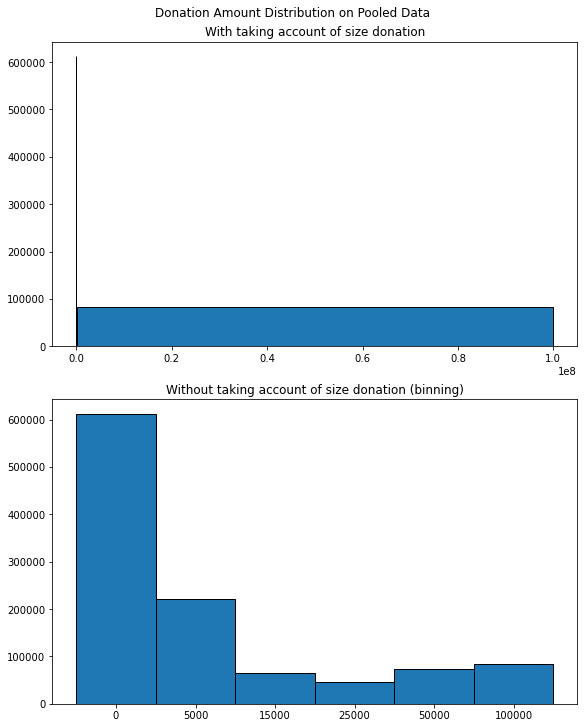

In [58]:
# 3. Distribution for amount of each donation in the pooled data

# Configure bins based on needs
bins=[0, 5000, 15000, 25000, 50000, 100000, 100000000]

fig = plt.figure(figsize=[8, 10] , constrained_layout=True)

# Original plot, accounting count and amount
ax = fig.add_subplot(211)
ax.hist(df_analysis['amount'], bins=bins, edgecolor='k')
ax.set_title('With taking account of size donation')

# Plot with some modification based on sliced to the bins
ax = fig.add_subplot(212)
h,e = np.histogram(df_analysis['amount'], bins=bins)
ax.bar(range(len(bins)-1),h, width=1, edgecolor='k')
ax.set_xticks(range(len(bins)-1))
ax.set_xticklabels(bins[:-1])
ax.set_title('Without taking account of size donation (binning)')

fig.suptitle('Donation Amount Distribution on Pooled Data')
fig.show()

/var/folders/6r/bbg64kh96z77l55kblwtwc8r0000gp/T/ipykernel_43457/1338511374.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


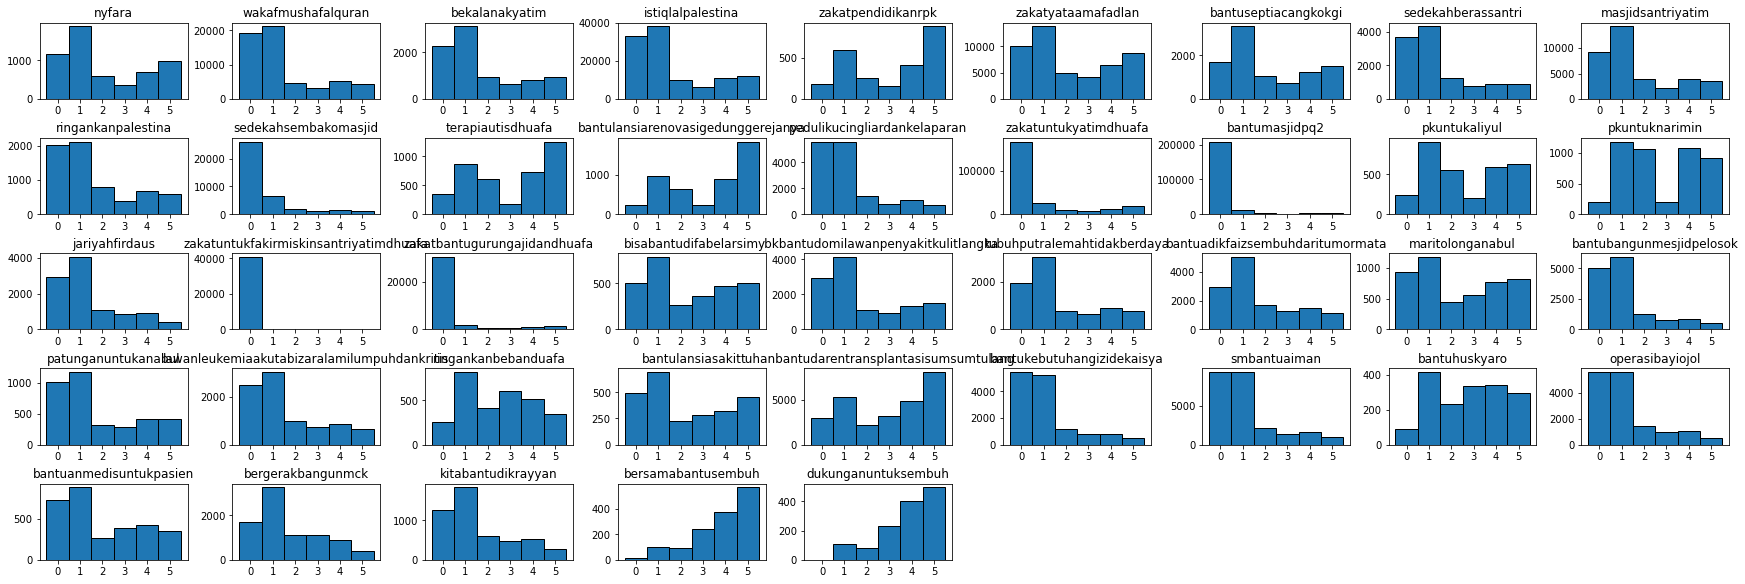

In [61]:
# 3. Distribution for amount of each donation on every donation
# Bin size is still the same with the previous plot 

fig = plt.figure(figsize=[24, 8], constrained_layout=True)

i = 1
for donation in df_analysis['short_url'].drop_duplicates():
    ax = fig.add_subplot(5, 9, i)  # adjust the size of the subplot based on number of campaigns
    h,e = np.histogram(df_analysis[df_analysis['short_url'] == donation]['amount'], bins=bins)
    ax.bar(range(len(bins)-1),h, width=1, edgecolor='k')
    ax.set_xticks(range(len(bins)-1), )
    # ax.set_xticklabels(bins[:-1])  # turned off to make it much clearer
    ax.set_title(donation)
    i = i + 1

fig.show()

Now, I am going to check the **descriptive statistics based on the categorical variable**. First, I will take a look at the donors level first, which is the 'is_anonymous' column. After that, I will move to the donation level. In the laid-out data, it's separated into several steps:

1. Counting the value counts of anonimity on pooled data and based on the short_url
2. Counting the categorical variable for donation level, including zakat, verification, campaigner type, and category name

In [62]:
# 1. Counting the value counts of anonimity on pooled data (cont.)
df_analysis['is_anonymous'].value_counts()

True     878885
False    224318
Name: is_anonymous, dtype: int64

In [63]:
# (cont.) 1. Counting the value counts of anonimity based on the short_url
df_analysis.groupby(['short_url', 'is_anonymous']).size().unstack(fill_value=0)

is_anonymous,False,True
short_url,,
bantuadikfaizsembuhdaritumormata,6033,7638
bantuanmedisuntukpasien,1172,1857
bantubangunmesjidpelosok,4022,10467
bantuhuskyaro,635,1072
bantukebutuhangizidekaisya,4282,9649
bantulansiarenovasigedunggerejanya,2255,2528
bantulansiasakit,896,1581
bantumasjidpq2,9381,220587
bantuseptiacangkokgi,3700,5847


In [66]:
# 2. Counting the categorical variable for donation level (cont.)
# Create the data frame first
df_analysis_onlycat = df_analysis[['short_url', 'is_verified', 
                                   'campaigner.type', 'category.name']].drop_duplicates()

In [69]:
# (cont.) 2. Make for loops to count the values in every categorical variable
for i in ['is_verified', 'campaigner.type', 'category.name']:
    display(df_analysis_onlycat[i].value_counts())

False    24
True     17
Name: is_verified, dtype: int64

ORGANIZATION    23
PERSONAL        18
Name: campaigner.type, dtype: int64

Balita & Anak Sakit          9
Kemanusiaan                  7
Rumah Ibadah                 5
Zakat                        5
Menolong Hewan               4
Bantuan Medis & Kesehatan    3
Panti Asuhan                 2
Bencana Alam                 2
Difabel                      2
Bantuan Pendidikan           1
Kegiatan Sosial              1
Name: category.name, dtype: int64

## Main Hypothesis for Data Analysis

Now, let's plot the data to my main interest:

### **Is there any correlation between initial seed donation to donation amount?**

In this case, I am going to bin the data by every 10% incremental. And then, I am going to label every donation with their respective bin at the time donation being made. After that, I am going to plot the data on count plot / histogram by (from the biggest to the smallest size of the donation):

1. Pooled data
2. Grouped by days_category (check it on previous section)
3. Grouped by category name
4. Grouped by each donation 
5. Grouped by is_verified 

<AxesSubplot:xlabel='progress_bin', ylabel='count'>

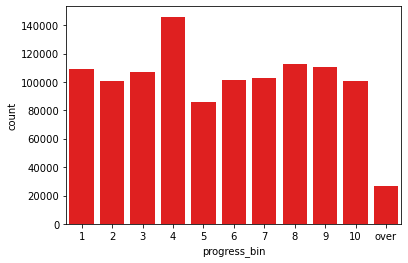

In [70]:
# 1. Pooled data plot

# count the value and plot it in histogram
df_analysis['progress_bin'].value_counts()
sns.countplot(x='progress_bin', data=df_analysis, color='red')

In [72]:
# Function for plotting by variable

def plot_by_cat(group):
    sns.catplot(data=df_analysis, 
                kind='count',
                x='progress_bin',
                col=group,
                palette = ['green'],
                col_wrap=5, height=4, aspect=1,
                sharey=False)  # to separate y-axis to its own category
    plt.tight_layout()
    plt.show()

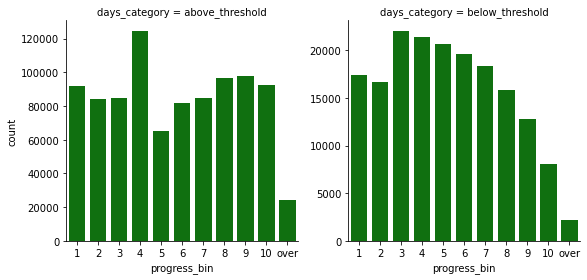

In [73]:
# 2. Pooled data by controlling days passed since donation starts
# Check the threshold in the previous section

plot_by_cat('days_category')

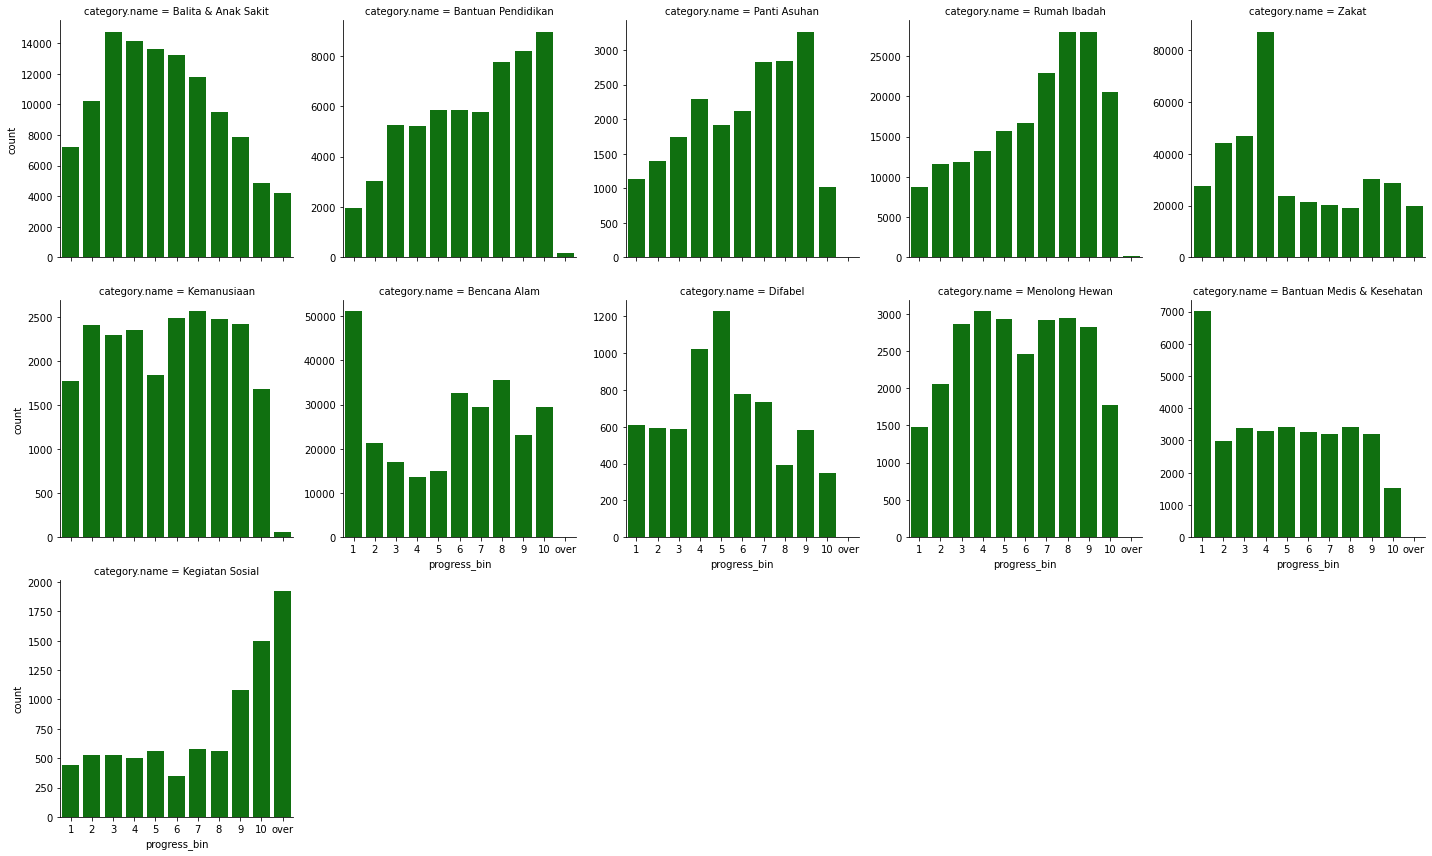

In [74]:
# 3. Pooled data by separating by each 
# Check the threshold in the previous section

plot_by_cat('category.name')

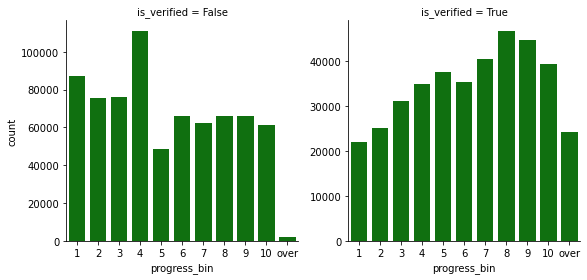

In [91]:
plot_by_cat('is_verified')

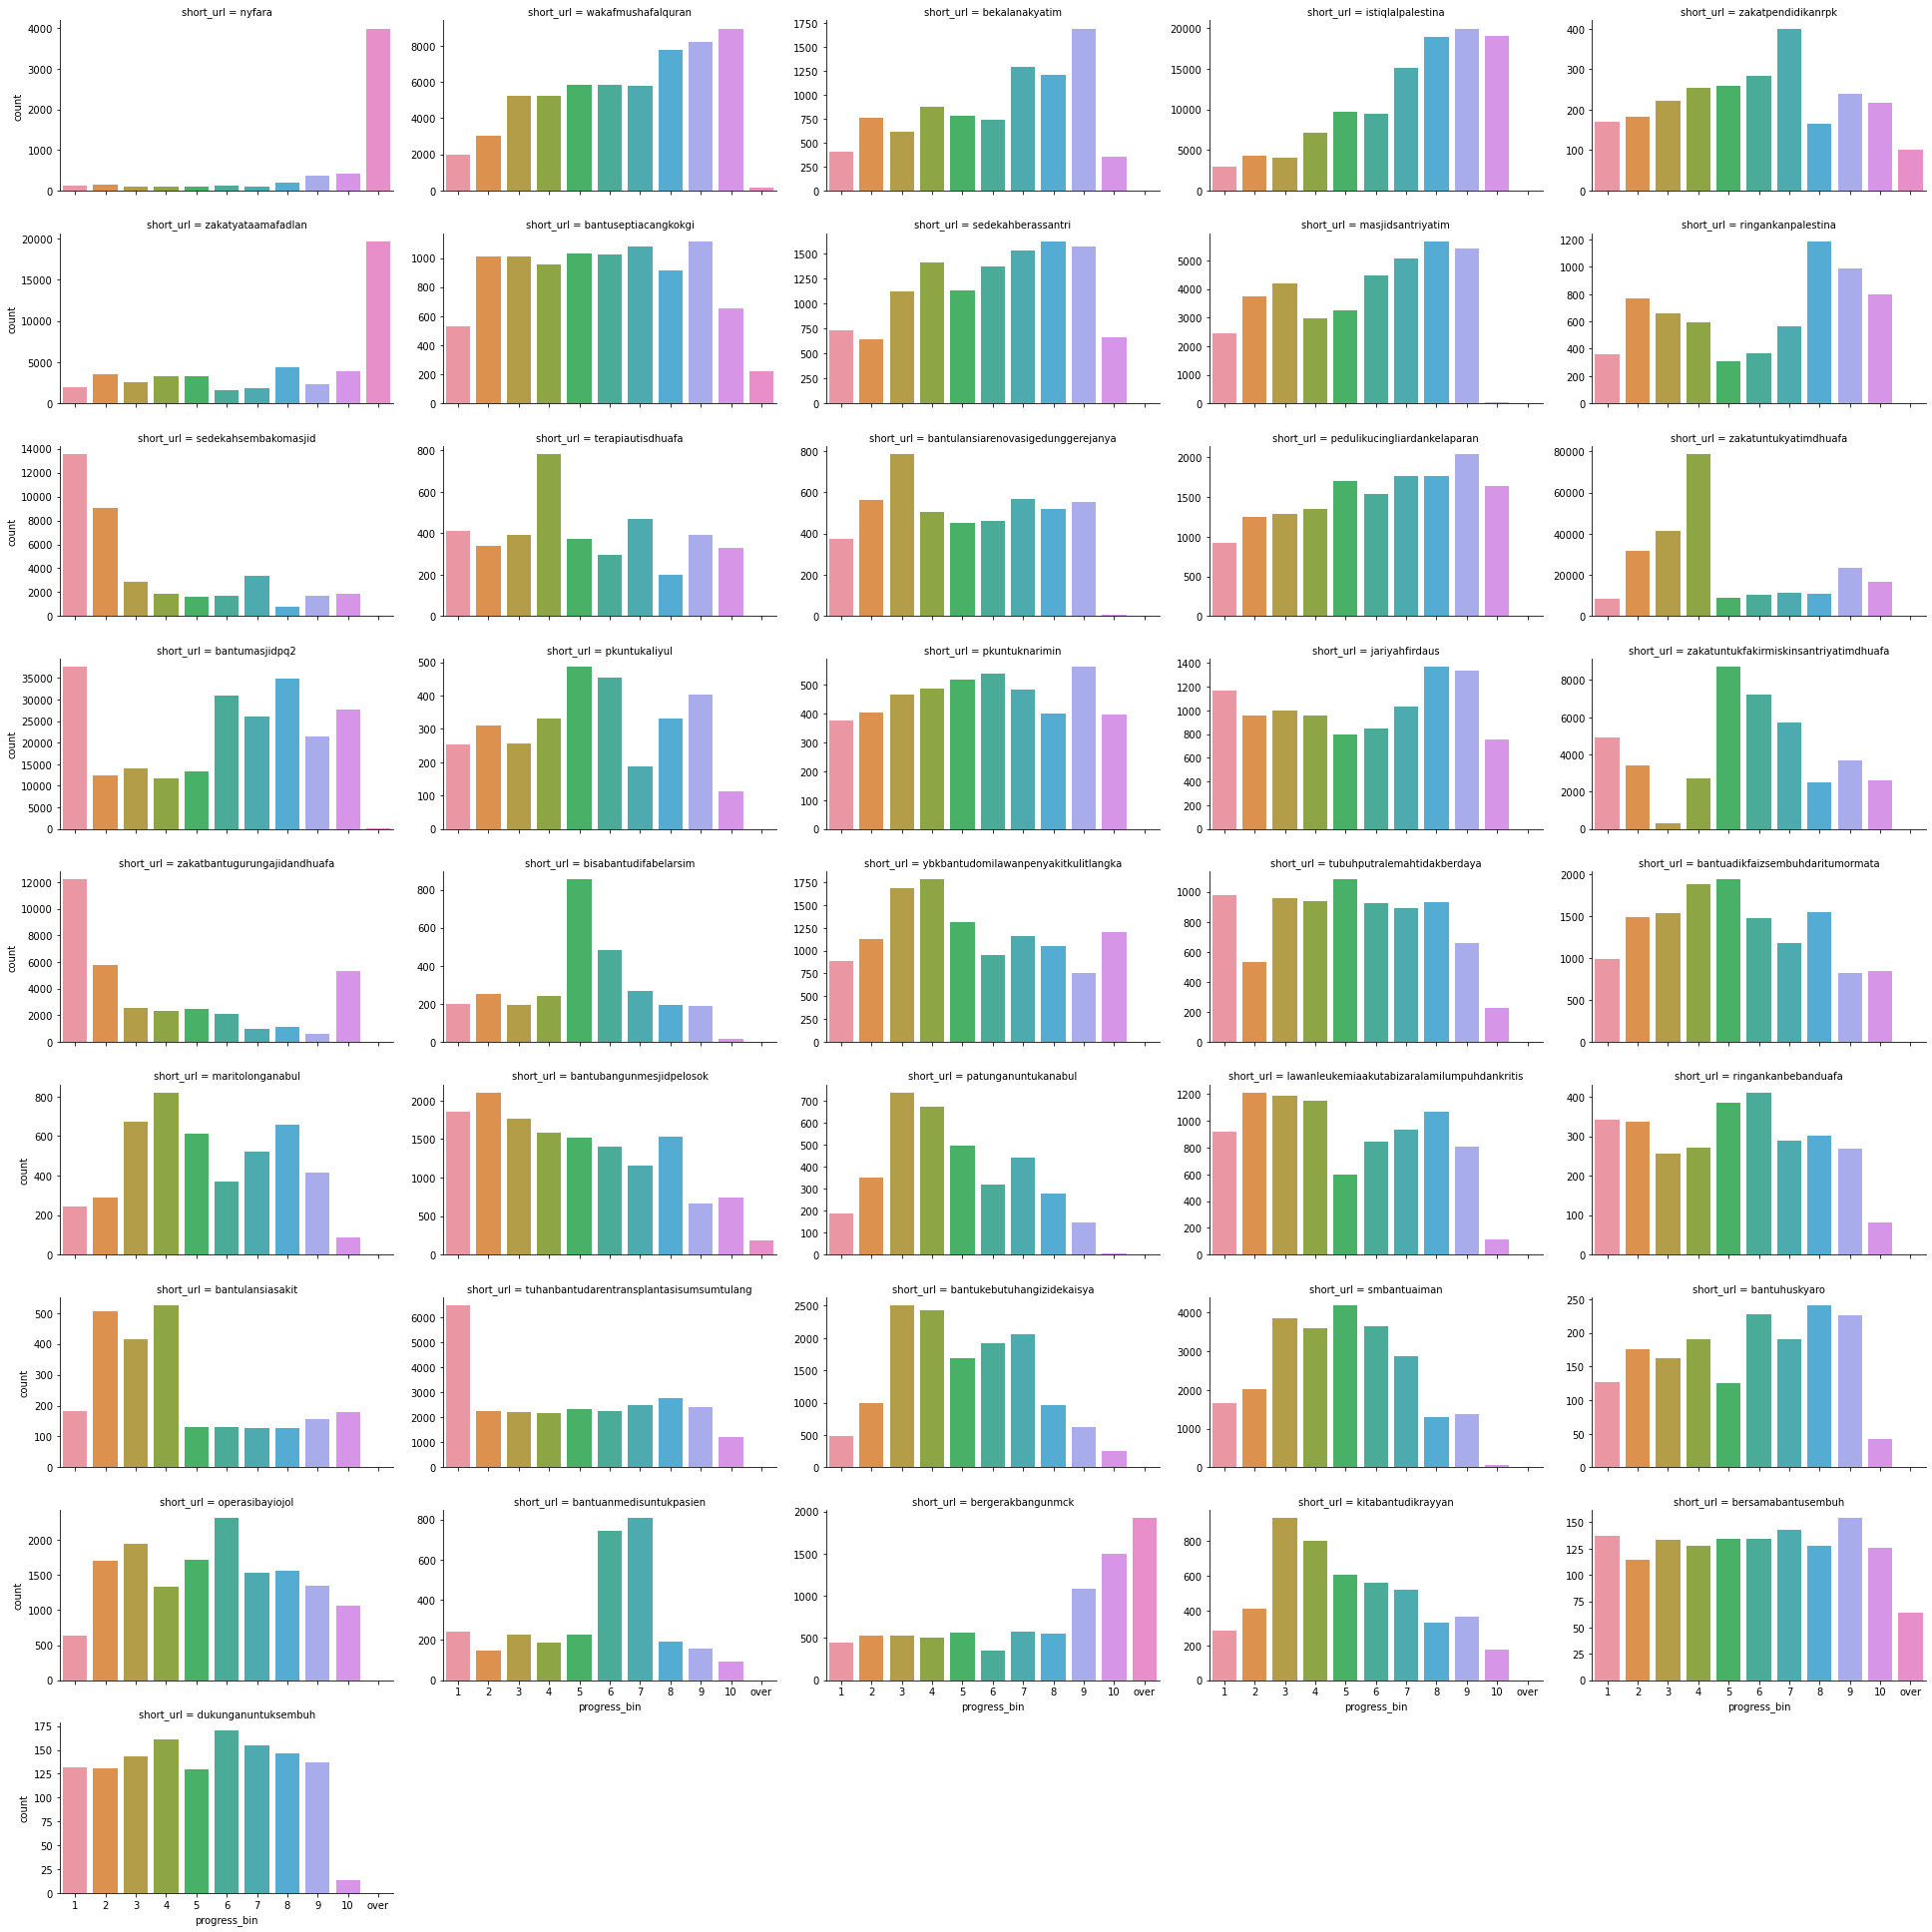

In [75]:
# 5. Separated donation plot

sns.catplot(data=df_analysis, 
            kind='count',
            x='progress_bin',
            col='short_url',
            col_wrap=5, height=3, aspect=1.8,
            sharey=False)  # to separate y-axis to its own category
plt.tight_layout()
plt.show()

# Notes 

Will be updated every time I made a new progress or findings.

1. Looks like that I found a pattern when thresholding the day to 360 days (1 year). I suspected for donations that already passed 1 year since they started raising the fund, they extended or re-open again the donation after the donation expired or closed.

In [80]:
df_analysis[df_analysis['days_category'] == 'below_threshold']['short_url'].unique()

array(['bisabantudifabelarsim', 'ybkbantudomilawanpenyakitkulitlangka',
       'tubuhputralemahtidakberdaya', 'bantuadikfaizsembuhdaritumormata',
       'maritolonganabul', 'bantubangunmesjidpelosok',
       'patunganuntukanabul',
       'lawanleukemiaakutabizaralamilumpuhdankritis',
       'ringankanbebanduafa', 'bantulansiasakit',
       'tuhanbantudarentransplantasisumsumtulang',
       'bantukebutuhangizidekaisya', 'smbantuaiman', 'bantuhuskyaro',
       'operasibayiojol', 'bantuanmedisuntukpasien', 'bergerakbangunmck',
       'kitabantudikrayyan', 'bersamabantusembuh', 'dukunganuntuksembuh'],
      dtype=object)

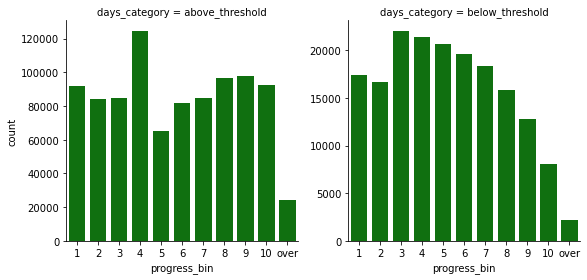

In [90]:
plot_by_cat('days_category')

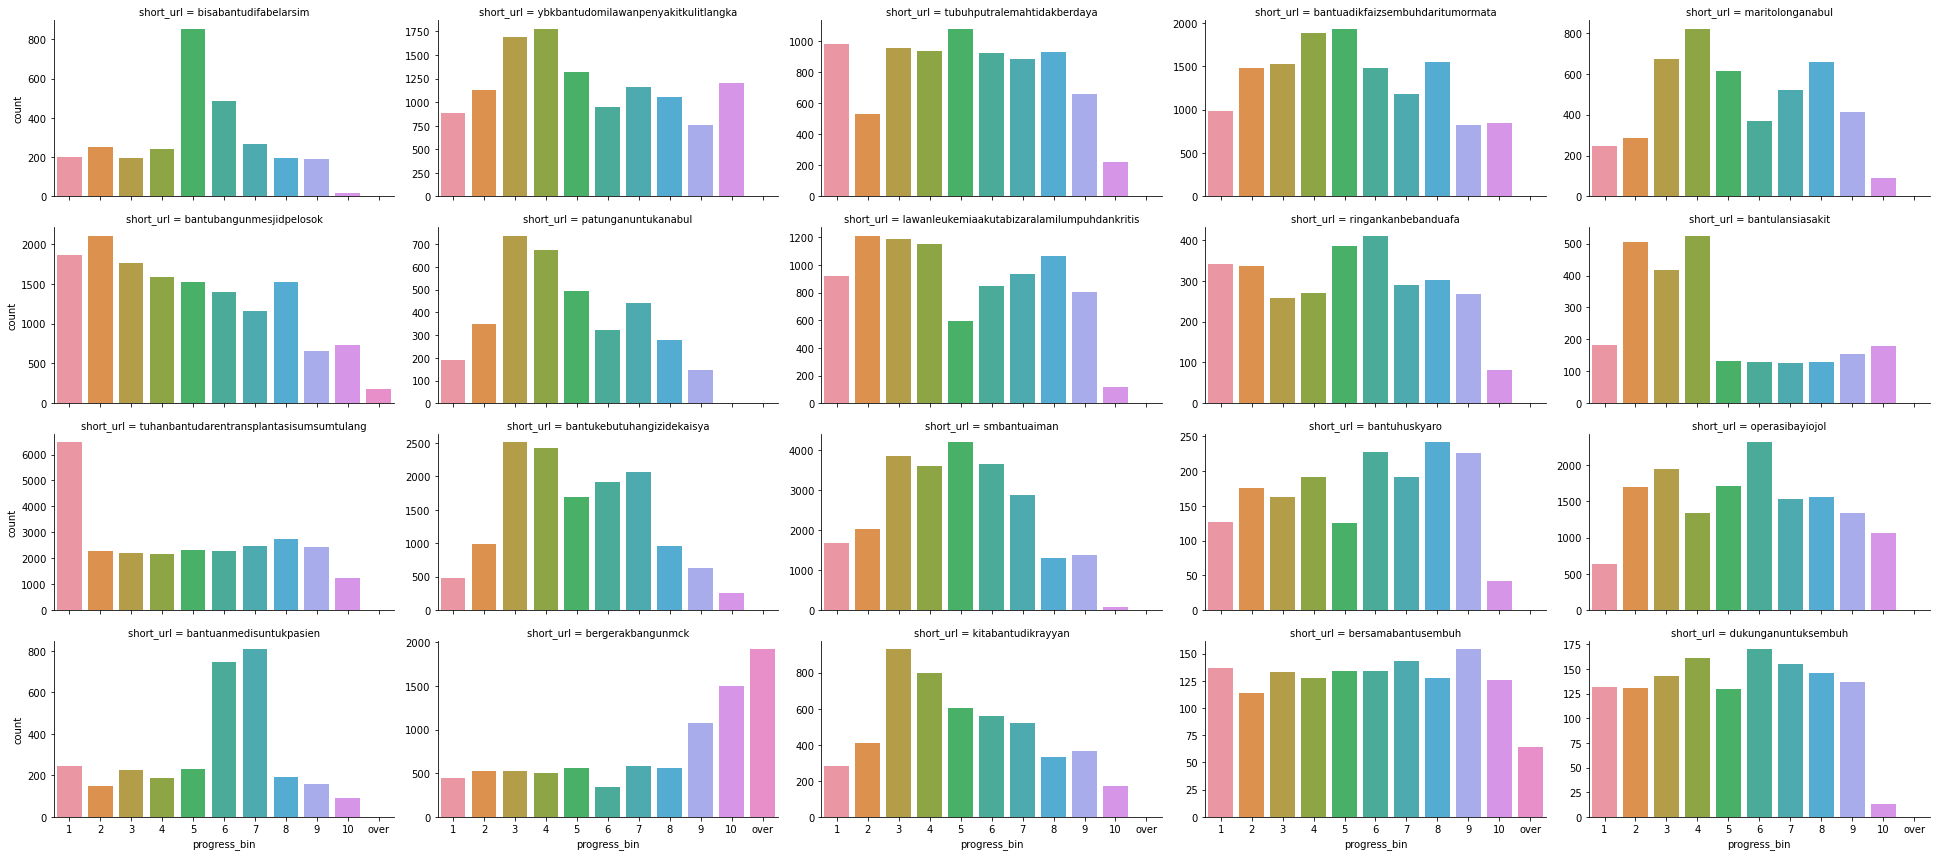

In [83]:
def plot_by_days(params):  #params -> 'below_threshold' or 'above_threshold'
    df = df_analysis[df_analysis['days_category'] == params]
    sns.catplot(data=df, 
                kind='count',
                x='progress_bin',
                col='short_url',
                col_wrap=5, height=3, aspect=1.8,
                sharey=False)  # to separate y-axis to its own category
    plt.tight_layout()
    plt.show()

plot_by_days('below_threshold')

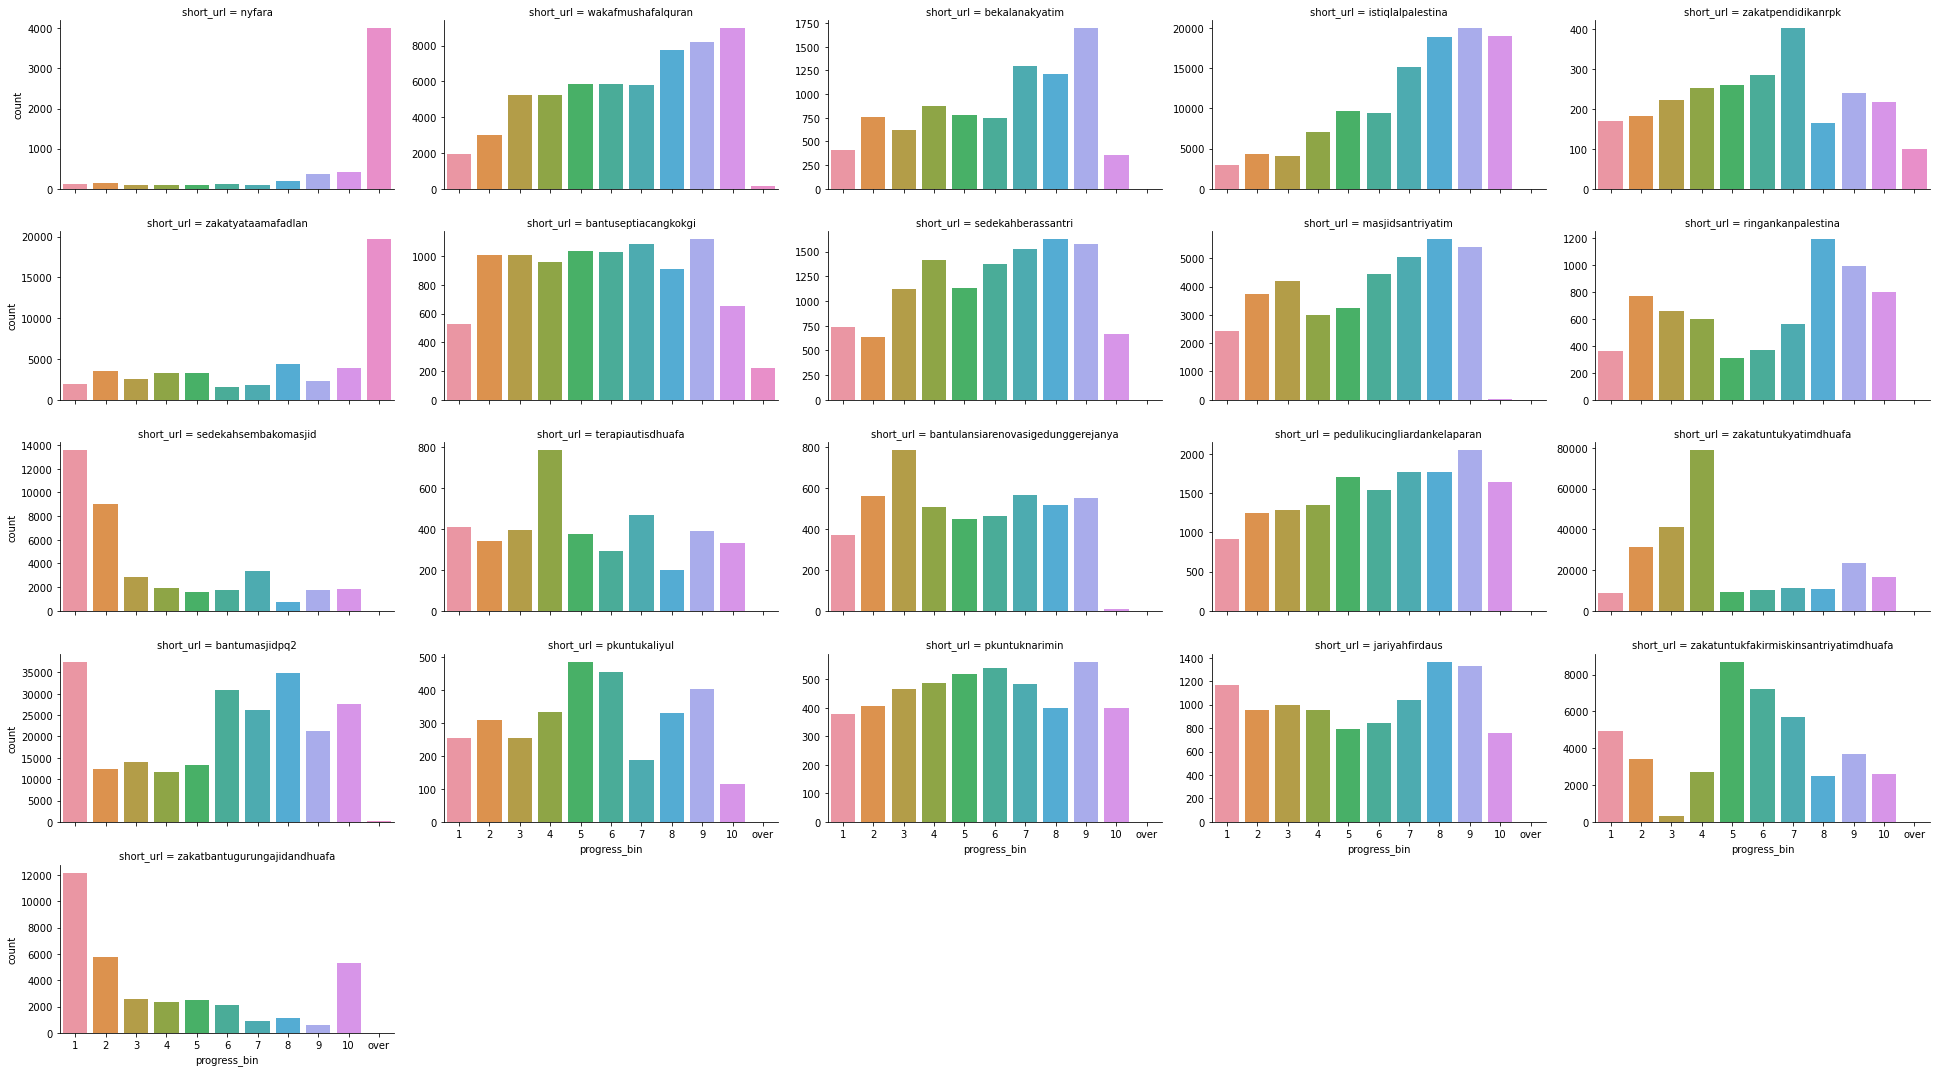

In [84]:
plot_by_days('above_threshold')

In [89]:
dayspassed_cat[dayspassed_cat['days_category'] == 'above_threshold']

,short_url,days_passed,days_category
5,bantulansiarenovasigedunggerejanya,640 days 00:30:19,above_threshold
7,bantumasjidpq2,600 days 01:11:03,above_threshold
8,bantuseptiacangkokgi,1289 days 20:04:34,above_threshold
9,bekalanakyatim,1416 days 21:05:13,above_threshold
14,istiqlalpalestina,1395 days 13:26:57,above_threshold
15,jariyahfirdaus,447 days 01:53:39,above_threshold
19,masjidsantriyatim,1180 days 06:22:28,above_threshold
20,nyfara,2187 days 17:06:38,above_threshold
23,pedulikucingliardankelaparan,654 days 23:55:05,above_threshold
24,pkuntukaliyul,536 days 03:34:32,above_threshold


In [88]:
dayspassed_cat[dayspassed_cat['days_category'] == 'below_threshold']

,short_url,days_passed,days_category
0,bantuadikfaizsembuhdaritumormata,266 days 01:39:01,below_threshold
1,bantuanmedisuntukpasien,37 days 07:33:39,below_threshold
2,bantubangunmesjidpelosok,256 days 06:19:06,below_threshold
3,bantuhuskyaro,86 days 06:29:31,below_threshold
4,bantukebutuhangizidekaisya,162 days 19:30:22,below_threshold
6,bantulansiasakit,203 days 10:02:46,below_threshold
10,bergerakbangunmck,16 days 19:10:45,below_threshold
11,bersamabantusembuh,36 days 21:17:23,below_threshold
12,bisabantudifabelarsim,313 days 21:04:35,below_threshold
13,dukunganuntuksembuh,37 days 19:53:19,below_threshold
